In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plot
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Helps you to label the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/Image_Classification/data'
train_dir = '/content/drive/MyDrive/Image_Classification/data/train'
train_vehicles_dir = '/content/drive/MyDrive/Image_Classification/data/train/train_vehicles'
train_non_vehicles_dir = '/content/drive/MyDrive/Image_Classification/data/train/train_non_vehicles'
test_dir = '/content/drive/MyDrive/Image_Classification/data/test'
test_vehicles_dir = '/content/drive/MyDrive/Image_Classification/data/test/test_vehicles'
test_non_vehicles_dir = '/content/drive/MyDrive/Image_Classification/data/test/test_non_vehicles'
valid_dir = '/content/drive/MyDrive/Image_Classification/data/validation'
valid_vehicles_dir = '/content/drive/MyDrive/Image_Classification/data/validation/validation_vehicles'
valid_non_vehicles_dir = '/content/drive/MyDrive/Image_Classification/data/validation/validation_non_vehicles'


In [ ]:
num_vehicles_train = len(os.listdir(train_vehicles_dir))
num_non_vehicles_train = len(os.listdir(train_non_vehicles_dir))
num_vehicles_validaition = len(os.listdir(valid_vehicles_dir))
num_non_vehicles_validation= len(os.listdir(valid_non_vehicles_dir))
num_vehicles_test = len(os.listdir(test_vehicles_dir))
num_non_vehicles_test= len(os.listdir(test_non_vehicles_dir))

print("Total Training vehicles Images",num_vehicles_train)
print("Total Training non vehicles Images",num_non_vehicles_train)
print("--")
print("Total validation vehicles Images",num_vehicles_validaition)
print("Total validation non vehicles Images",num_non_vehicles_validation)
print("--")
print("Total Test vehicles Images",num_vehicles_test)
print("Total Test non vehicles Images",num_non_vehicles_test)
total_train = num_vehicles_train+num_non_vehicles_train
total_validation = num_vehicles_validaition+num_non_vehicles_validation
total_test = num_vehicles_test+num_non_vehicles_test
print("Total Training Images",total_train)
print("--")
print("Total Validation Images",total_validation)
print("--")
print("Total Testing Images",total_test)

Total Training vehicles Images 6032
Total Training non vehicles Images 6484
--
Total validation vehicles Images 1536
Total validation non vehicles Images 1332
--
Total Test vehicles Images 1224
Total Test non vehicles Images 1152
Total Training Images 12516
--
Total Validation Images 2868
--
Total Testing Images 2376


In [ ]:
IMG_SHAPE  = 224
batch_size = 50


In [ ]:
image_gen_train = ImageDataGenerator(rescale = 1./255)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
directory = train_dir,
shuffle= True,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'binary')
image_generator_validation = ImageDataGenerator(rescale=1./255)
val_data_gen = image_generator_validation.flow_from_directory(batch_size=batch_size,
directory=valid_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
directory=test_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')

Found 12516 images belonging to 2 classes.
Found 2868 images belonging to 2 classes.
Found 2376 images belonging to 2 classes.


In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

In [ ]:
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False




input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(2, activation='sigmoid')(x)

In [ ]:
x = tf.keras.layers.Dense(3, activation='softmax')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
vgg_classifier = model.fit(train_data_gen,
steps_per_epoch=(total_train//batch_size),
epochs = 40,
validation_data=val_data_gen,
validation_steps=(total_validation//batch_size),
batch_size = batch_size,
verbose = 1)



Epoch 1/40
250/250 [==============================] - 4417s 18s/step - loss: 0.5877 - acc: 0.9296 - val_loss: 0.4612 - val_acc: 0.9533
Epoch 2/40
250/250 [==============================] - 78s 310ms/step - loss: 0.3948 - acc: 0.9710 - val_loss: 0.3539 - val_acc: 0.9579
Epoch 3/40
250/250 [==============================] - 80s 320ms/step - loss: 0.3009 - acc: 0.9774 - val_loss: 0.2794 - val_acc: 0.9670
Epoch 4/40
250/250 [==============================] - 81s 325ms/step - loss: 0.2454 - acc: 0.9791 - val_loss: 0.2402 - val_acc: 0.9667
Epoch 5/40
250/250 [==============================] - 82s 327ms/step - loss: 0.2024 - acc: 0.9825 - val_loss: 0.2091 - val_acc: 0.9674
Epoch 6/40
250/250 [==============================] - 82s 330ms/step - loss: 0.1708 - acc: 0.9848 - val_loss: 0.1760 - val_acc: 0.9733
Epoch 7/40
250/250 [==============================] - 82s 328ms/step - loss: 0.1489 - acc: 0.9846 - val_loss: 0.1682 - val_acc: 0.9688
Epoch 8/40
250/250 [==============================] - 8

In [ ]:
result = model.evaluate(test_data_gen,batch_size=batch_size)
print("test_loss, test accuracy",result)

48/48 [==============================] - 1173s 25s/step - loss: 0.0614 - acc: 0.9802
test_loss, test accuracy [0.061440419405698776, 0.9802188277244568]


In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Image_Classification/VGG_vehicles_Classifier.json", "w") as json_file:
  json_file.write(model_json)
  model.save("/content/drive/MyDrive/Image_Classification/VGG_vehicles_Classifier.h5")
  print("Saved model to disk")
  model.save_weights("/content/drive/MyDrive/Image_Classification/VGG_vehicles.h5")

Saved model to disk


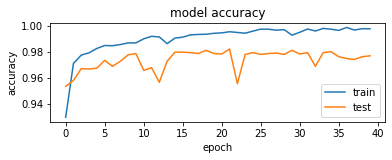

In [ ]:
plot.subplot(2,1,1)
plot.plot(vgg_classifier.history['acc'])
plot.plot(vgg_classifier.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

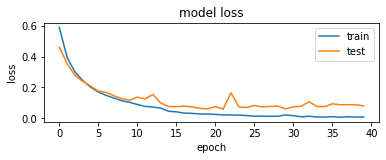

In [ ]:
plot.subplot(2,1,2)
plot.plot(vgg_classifier.history['loss'])
plot.plot(vgg_classifier.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

In [ ]:
'''model = tf.keras.models.load_model('/content/drive/MyDrive/Image_Classification/VGG_vehicles_Classifier.h5')

# model = tf.load_model("")
input_img = cv2.imread("/content/drive/MyDrive/Image_Classification/data/test/test_non_vehicles/extra1000.png")
input_img = cv2.resize(input_img,(224,224))
# class_no = model.predict(input_img)'''



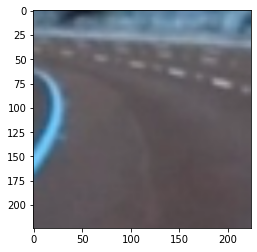

In [ ]:
'''import matplotlib.pyplot as plt
# img = cv2.imread("/content/drive/MyDrive/Image_Classification/data/test/test_non_vehicles/extra1000.png")
plt.imshow(input_img)
# img.shape'''

In [ ]:
'''import numpy as np
input_img = np.expand_dims(input_img,axis = 0)
class_no = model.predict(input_img)'''

1/1 [==============================] - 1s 1s/step


In [ ]:
#class_no

array([[9.9823064e-01, 1.6361451e-03, 1.3325737e-04]], dtype=float32)

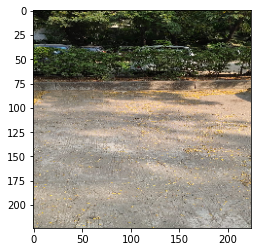

1/1 [==============================] - 1s 545ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


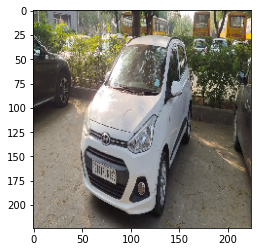

1/1 [==============================] - 1s 542ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


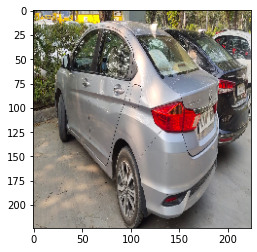

1/1 [==============================] - 1s 536ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


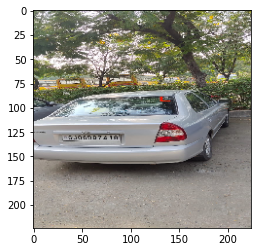

1/1 [==============================] - 1s 533ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


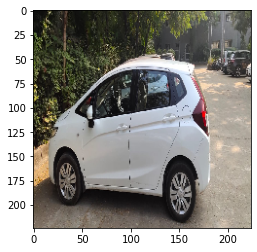

1/1 [==============================] - 1s 562ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


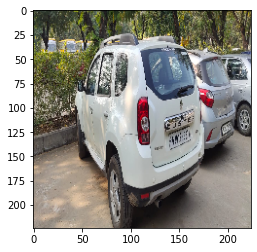

1/1 [==============================] - 1s 583ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


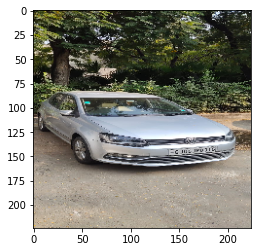

1/1 [==============================] - 1s 575ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


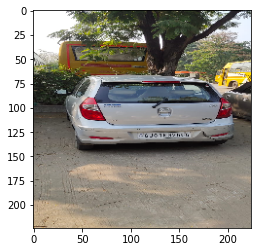

1/1 [==============================] - 1s 540ms/step
[[1.2475650e-03 9.9859709e-01 1.5539699e-04]]


In [ ]:
# testing dataset
dir_path = '/content/drive/MyDrive/Image_Classification/test_for_vgg'
# Reading every image and check it is classifying correctly
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//'+ i, target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(val)
  v1 = np.max(val)

  # if v1.all() == val[0]:
  #   print("NON VEHICLE")
  # elif v1.all() == val[1]:
  #   print("VEHICLE")